# <span style="color: blue;">Projeto de Análise de Dados de Obras do MyAnimeList</span>

[Dataset Source - MyAnimeList Anime & Manga Dataset (July 2025)](https://www.kaggle.com/datasets/hamzaashfaque1999/myanimelist-scraped-data/) \
[Autor: Gregory280](https://github.com/Gregory280)

## <span style="color: blue;">Análises</span>

**Notebook 2 de 2**

### <span style="color: blue;">Fonte de Dados</span>
Conjunto de dados extraído de um banco de dados de animes e mangás conhecido como MyAnimeList.net.
Os dados extraídos são de animes e mangás disponíveis no site de até julho de 2025.
Contém dois arquivos .csv com um total de 105.983 entradas extraídas, sendo 77.348 entradas de obras.

### <span style="color: blue;">Pacotes</span>

In [109]:
# Pacotes utilizados
import ast
from collections import Counter
from sklearn.preprocessing import MultiLabelBinarizer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [2]:
%reload_ext watermark
%watermark -a "Gregory280"

Author: Gregory280



## <span style="color: blue;">Análise Exploratória</span>

In [3]:
# Carregamos a variável contendo o dataset tratado do notebook anterior
%store -r df_limpo

### <span style="color: blue;">Estatísticas Gerais e Percentis</span>

In [4]:
# Descrevendo os dados numéricos
df_limpo[['score', 'scored_by', 'members']].describe()

,score,scored_by,members
count,28466.000000,77348.000000,77348.000000
mean,6.906382,668.253943,1808.002431
std,0.527300,5824.307522,11769.780891
min,2.460000,0.000000,3.000000
25%,6.570000,0.000000,67.000000
50%,6.870000,0.000000,196.000000
75%,7.210000,246.000000,793.000000
max,9.470000,422579.000000,759620.000000


* A média de nota de todas as obras é de 6.87.
* A maior nota é de 9.47.
* Apenas 25% de todas as obras possuem nota superior a 7.21.
* A média de avaliações que uma obra recebe é de 668.
* A maior quantidade de avaliações que uma obra recebeu foi de 422.579 avaliações.

Estatísticas gerais sobre os <b>gêneros das obras</b>:

In [5]:
df_exp = df_limpo.explode('genres')
df_exp.groupby('genres')['score'].describe().sort_values('mean')

,count,mean,std,min,25%,50%,75%,max
genres,,,,,,,,
Avant Garde,44.0,6.486136,0.557107,5.34,6.1600,6.410,6.7600,8.04
Ecchi,1732.0,6.589382,0.543125,3.96,6.2500,6.570,6.9500,8.86
Hentai,2190.0,6.708119,0.353488,4.65,6.5200,6.710,6.9000,8.17
Horror,1041.0,6.745841,0.709521,3.91,6.3300,6.720,7.1800,9.47
Girls Love,1150.0,6.775348,0.514694,5.15,6.4425,6.745,7.1000,8.65
Erotica,5338.0,6.829015,0.442065,4.76,6.5600,6.810,7.1000,8.46
Boys Love,5798.0,6.907358,0.446721,4.76,6.6100,6.870,7.1700,9.01
Comedy,7173.0,6.924256,0.532498,2.46,6.5700,6.900,7.2500,9.03
Romance,8766.0,6.942148,0.487577,2.46,6.6225,6.920,7.2300,8.90


* Média de nota para obras de esporte é de 7.0.
* Média de nota para obras sobre comida (Gourmet) é de 7.1.
* As menores notas entre todas as obras estão nas obras de gênero comédia e romance.

In [6]:
# Calcula os percentis da coluna score
percentis = df_limpo['score'].quantile([0.25, 0.5, 0.75])

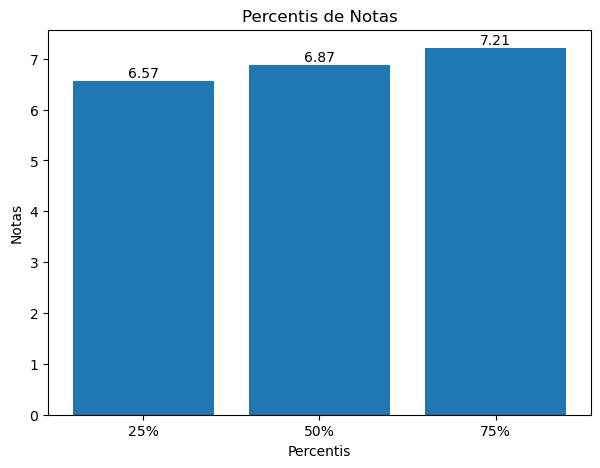

In [7]:
plt.figure(figsize=(7,5))
plt.bar(['25%', '50%', '75%'], percentis.values)
titulo = plt.title('Percentis de Notas')
plt.xlabel('Percentis')
plt.ylabel('Notas')
for i, v in enumerate(percentis.values):
    plt.text(i, v + 0.07, f"{v:.2f}", ha='center')
# Para salvar os gráficos
plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

Os principais percentis são muito próximos um do outro, indicando <b>baixa variabilidade na distribuição</b> de notas das obras.

In [8]:
# Calcula os percentis da coluna members
percentis = df_limpo['members'].quantile([0.25, 0.5, 0.75, 0.95])

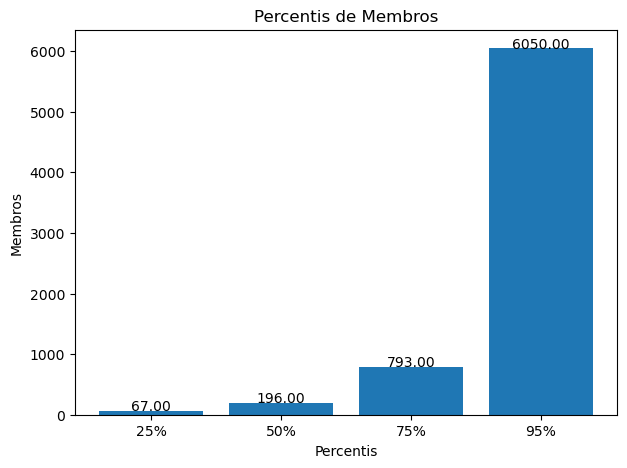

In [9]:
plt.figure(figsize=(7,5))
plt.bar(['25%', '50%', '75%', '95%'], percentis.values)
titulo = plt.title('Percentis de Membros')
plt.xlabel('Percentis')
plt.ylabel('Membros')
for i, v in enumerate(percentis.values):
    plt.text(i, v + 0.07, f"{v:.2f}", ha='center')
# Para salvar os gráficos
plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

Distribuição de membros <b>bem assítimetrica</b>, indicando que <b>pouquissímas</b> obras possuem membros (pessoas que adicionaram a obra à suas listas).

### <span style="color: blue;">Distribuições</span>

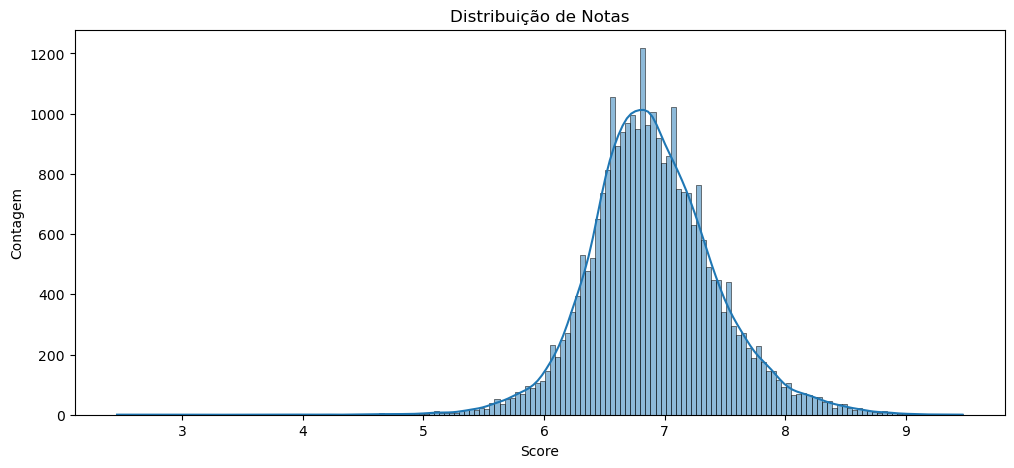

In [10]:
# Distribuições de Scores (notas dos animes)
plt.figure(figsize= (12, 5))
sns.histplot(df_limpo['score'], kde = True)
titulo = plt.title('Distribuição de Notas')
plt.xlabel('Score')
plt.ylabel('Contagem')
# Para salvar os gráficos
plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

Como visto antes, a maior das notas se encontram na faixa 6.7 a 7.2.

In [11]:
df_exp = df_limpo.explode('genres').reset_index(drop=True)

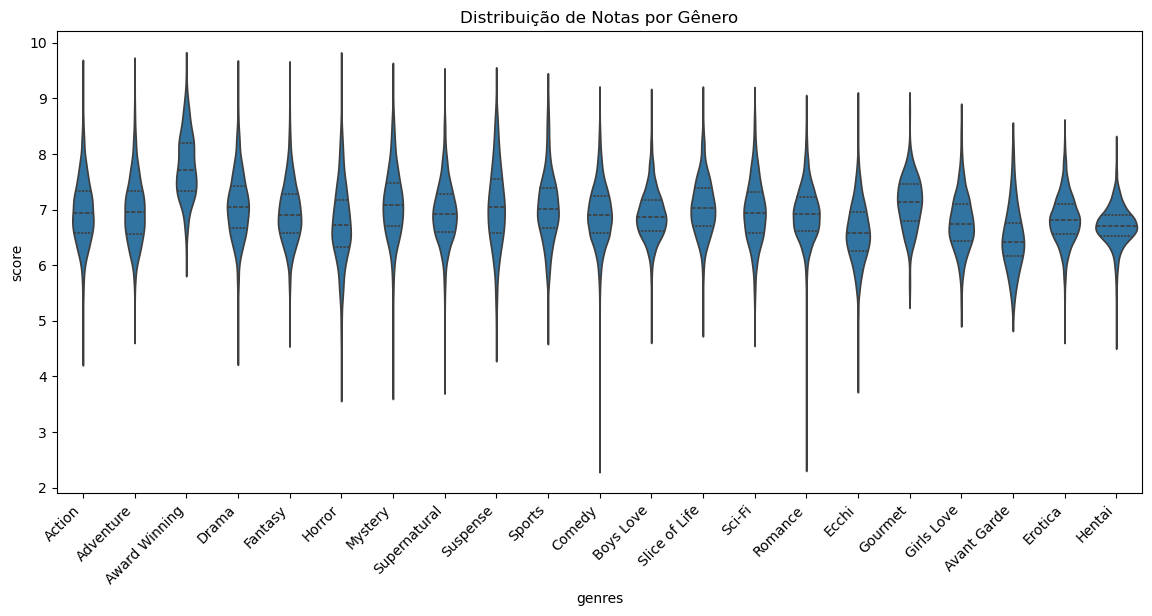

In [12]:
plt.figure(figsize=(14,6))
titulo = plt.title('Distribuição de Notas por Gênero')
sns.violinplot(data=df_exp, x='genres', y='score', inner='quartile')
plt.xticks(rotation=45, ha='right')
# Para salvar os gráficos
plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

Os gêneros que mais variam de nota (que possuem notas bem altas e bem baixas) é <b>comédia e romance</b>, indicando que as avaliações são muito <b>polares</b>, muitos ou amam ou odeiam. \
Devido ao componente emocional atrelado à obra, os gêneros de romance são extremamente mal avaliados se o romance não seguir como ou quem o leitor gostaria que seguisse. \
A ausência dos bigodes no gráfico de violino indica que o gênero Avant Garde é o gênero com notas mais estáveis, isto é, baixa variabilidade de notas, menos polarização na opinião sobre as obras.

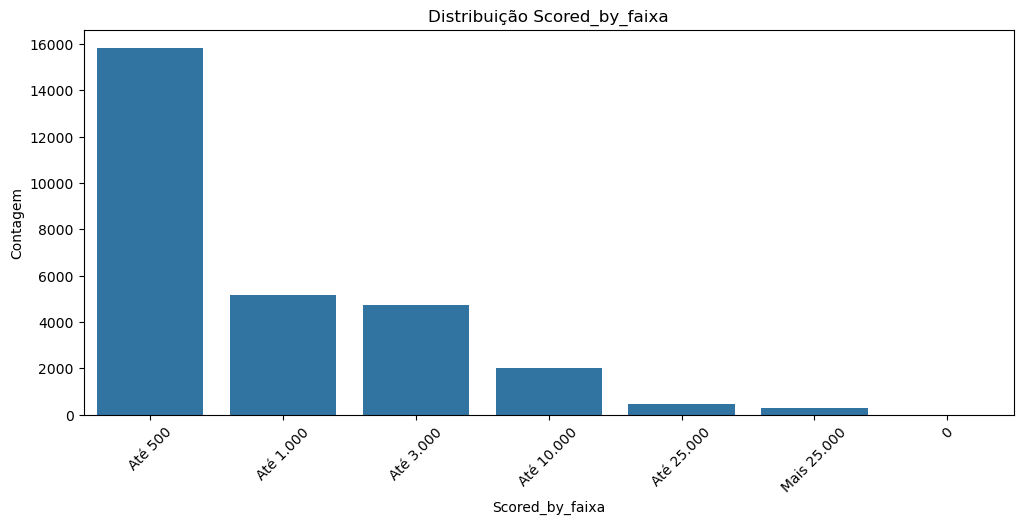

In [13]:
# Gráfico sem a categória 0
plt.figure(figsize=(12, 5))
sns.countplot(x='scored_by_faixa', data=df_limpo[df_limpo['scored_by_faixa'] != "0"], order=df_limpo['scored_by_faixa'].cat.categories)
titulo = plt.title('Distribuição Scored_by_faixa')
plt.xlabel('Scored_by_faixa')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
# Para salvar os gráficos
plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

Indica que boa parte das obras possuem apenas até 500 pessoas dando avaliações. Rarissímos são os casos de obras com até ou mais de 25.000 avaliações.

In [14]:
# Calcula a frequência dos valores da coluna themes
frequencia_themes = Counter([theme for t in df_limpo['themes'] for theme in t])

In [15]:
# Cria um dataframe para armazenar o resultado
df_frequencia_themes = pd.DataFrame.from_dict(frequencia_themes, orient='index', columns=['frequencia'])

In [16]:
# Ordena pelo mais frequente
df_frequencia_themes = df_frequencia_themes.sort_values(by='frequencia', ascending=False)

In [17]:
# Renomeia as colunas
df_frequencia_themes.reset_index(inplace=True)
df_frequencia_themes.rename(columns={'index':'tema'}, inplace=True)

In [18]:
df_frequencia_themes.shape

(53, 2)

Foram encontrados 53 temas diferentes.

In [19]:
df_frequencia_themes.describe()

,frequencia
count,53.000000
mean,774.679245
std,1735.721472
min,67.000000
25%,207.000000
50%,319.000000
75%,716.000000
max,12427.000000


* A maior quantidade de obras que um tema possui é de 12.427 obras.
* Apenas 25% dos temas possuem mais de 716 obras.

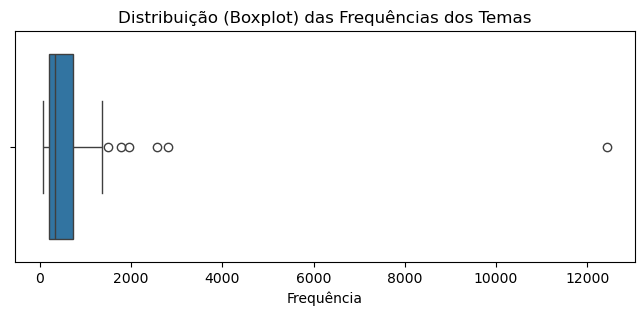

In [20]:
plt.figure(figsize=(8,3))
sns.boxplot(data=df_frequencia_themes, x="frequencia")
plt.title("Distribuição (Boxplot) das Frequências dos Temas")
plt.xlabel("Frequência")
# Para salvar os gráficos
plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

* Distribuição extremamente assimétrica, nenhum supresa.
* Existe um tema em específico que se sobressai e muito de todos os outros. 

In [21]:
# Imprime todos os temas e a quantidade de animes que possui (frequencia) em ordem decrescente
df_frequencia_themes.style.bar(subset=['frequencia'], color='lightblue').hide(axis='index')

tema,frequencia
School,12427
Historical,2816
Harem,2557
Isekai,1944
Psychological,1767
Adult Cast,1497
Reincarnation,1359
Mythology,934
Time Travel,850
Martial Arts,833


O tema mais recorrente disparado nas obras é a <b>ambientação escolar</b>.

In [22]:
# Calcula a frequência dos valores da coluna genres
frequencia_genres = Counter([genre for g in df_limpo['genres'] for genre in g])

In [23]:
# Cria um dataframe para armazenar o resultado
df_frequencia_genres = pd.DataFrame.from_dict(frequencia_genres, orient='index', columns=['frequencia'])

In [24]:
# Ordena pelo mais frequente
df_frequencia_genres = df_frequencia_genres.sort_values(by='frequencia', ascending=False)

In [25]:
# Renomeia as colunas
df_frequencia_genres.reset_index(inplace=True)
df_frequencia_genres.rename(columns={'index':'genero'}, inplace=True)

In [26]:
df_frequencia_genres.shape

(21, 2)

Foram encontrados 21 gêneros diferentes

In [27]:
# Imprime todos os temas e a quantidade de animes que possui (frequencia) em ordem decrescente
df_frequencia_genres.style.bar(subset=['frequencia'], color='lightblue').hide(axis='index')

genero,frequencia
Romance,19646
Comedy,16046
Fantasy,14346
Hentai,13012
Boys Love,11243
Drama,10981
Action,10592
Erotica,10527
Supernatural,8349
Slice of Life,5398


In [28]:
# Calcula os percentis da frequência de gêneros
percentis = df_frequencia_genres['frequencia'].quantile([0.25, 0.5, 0.75])

In [29]:
percentis

0.25     1956.0
0.50     4482.0
0.75    10981.0
Name: frequencia, dtype: float64

* Apenas 25% dos gêneros possuem mais de 10.981 obras.
* Apenas 50% dos gêneros possuem mais de 4.482 obras.

In [30]:
status_counts = df_limpo['status'].value_counts()

In [31]:
status_counts

status
Finished        64565
Publishing      12227
On Hiatus         380
Discontinued      176
Name: count, dtype: int64

Temos 12.227 obras em andamento e 380 em hiato.

## Respondendo Perguntas

#### Quais são as 10 obras mais bem avaliadas?

In [32]:
# Retorna o titulo e nota dos 10 animes mais maiores notas
df_limpo.nlargest(10, 'score')[['title_name', 'score']]

,title_name,score
0,Berserk,9.47
1,JoJo no Kimyou na Bouken Part 7: Steel Ball Ru...,9.32
2,Vagabond,9.27
3,One Piece,9.22
4,Monster,9.16
5,Guimi Zhi ZhuLord of Mysteries,9.10
6,Vinland Saga,9.09
7,Slam Dunk,9.08
8,Fullmetal Alchemist,9.04
9,Omniscient Reader's Viewpoint,9.04


#### Quais são as 10 obras que mais foram avaliadas?

In [33]:
# Retorna titulo e scored_by dos 10 animes que mais foram avaliados
df_limpo.nlargest(10, 'scored_by')[['title_name', 'scored_by']]

,title_name,scored_by
121,Shingeki no KyojinAttack on Titan,422579
63,Chainsaw Man,409505
3,One Piece,405920
0,Berserk,380203
83,Solo Leveling,349239
555,Kimetsu no YaibaDemon Slayer: Kimetsu no Yaiba,303093
129,Tokyo Ghoul,294698
635,Naruto,282008
1011,Bleach,251219
56,One Punch-ManOne-Punch Man,251104


#### Quais são as 10 obras com mais membros (adicionadas à listas)?

In [34]:
# Retorna titulo e membros dos 10 animes com mais membros
df_limpo.nlargest(10, 'members')[['title_name', 'members']]

,title_name,members
0,Berserk,759620
121,Shingeki no KyojinAttack on Titan,679412
63,Chainsaw Man,678546
3,One Piece,669303
83,Solo Leveling,585129
129,Tokyo Ghoul,540567
56,One Punch-ManOne-Punch Man,512346
13,Oyasumi PunpunGoodnight Punpun,492191
406,Jujutsu Kaisen,477385
555,Kimetsu no YaibaDemon Slayer: Kimetsu no Yaiba,476531


#### Quais são os 15 gêneros com mais obras?

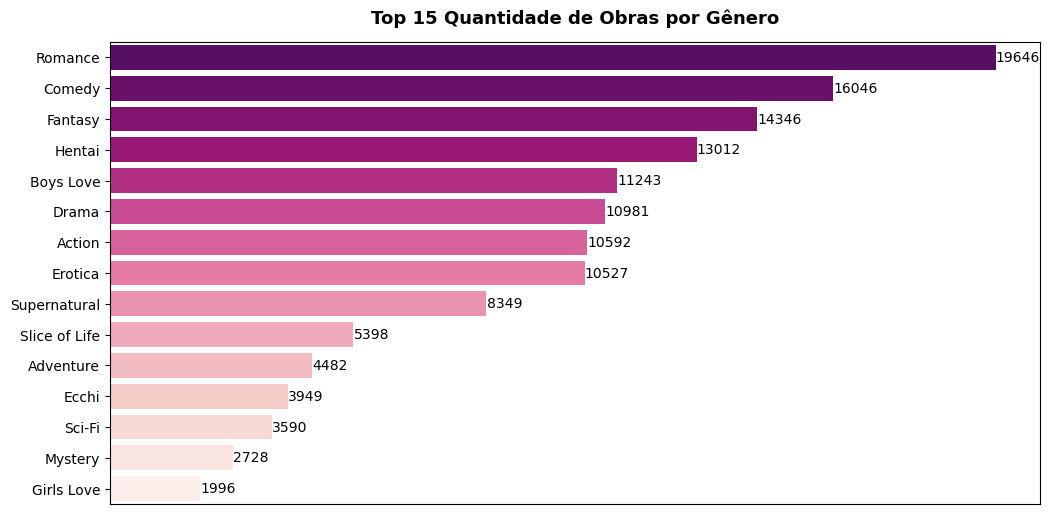

In [35]:
plt.figure(figsize=(12,6))
titulo = plt.title('Top 15 Quantidade de Obras por Gênero', fontsize=13, fontweight='bold', pad=13)
ax = sns.barplot(data=df_frequencia_genres.head(15), x='frequencia', y='genero', palette='RdPu_r')
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 5, p.get_y() + p.get_height()/2, int(width), va='center')
ax.xaxis.set_visible(False)
plt.ylabel('')
# Para salvar os gráficos
plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

#### Quais são as médias de notas por gênero?

In [36]:
# Separarmos os gêneros das listas para cada um ser representado em uma linha
df_limpo_exploded = df_limpo.explode('genres')

In [37]:
# Realizamos a média de nota por gênero
df_media_por_genero = df_limpo_exploded.groupby('genres')['score'].mean().sort_values(ascending=False)

In [38]:
# Renomeia as colunas
df_media_por_genero = df_media_por_genero.reset_index()
df_media_por_genero.columns = ['genero', 'nota_media']

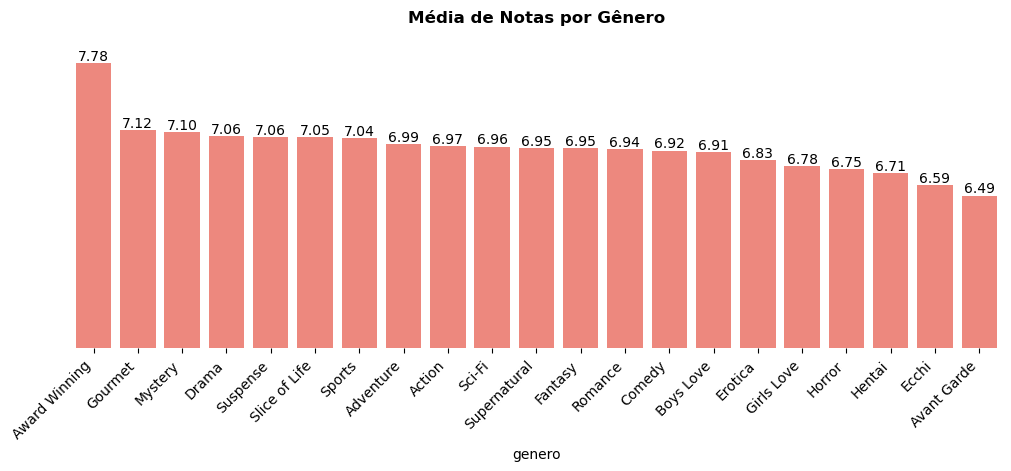

In [39]:
plt.figure(figsize=(12,4))
titulo = plt.title('Média de Notas por Gênero', fontsize=12, fontweight='bold', pad=13)
ax = sns.barplot(data=df_media_por_genero, x='genero', y='nota_media', color=sns.xkcd_rgb['salmon'])
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width()/2, p.get_height()), ha='center', va='bottom')
plt.ylim(5,8)
ax.yaxis.set_visible(False)
sns.despine(left=True, bottom=True)
plt.ylabel('')
plt.xticks(rotation=45, ha='right')
# Para salvar os gráficos
plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

#### Quais são os gêneros que mais aparecem juntos?

In [40]:
# Criando a matriz de coocorrências de gêneros
mlb = MultiLabelBinarizer()
generos_bin = mlb.fit_transform(df_limpo['genres'])
df_generos_bin = pd.DataFrame(generos_bin, columns=mlb.classes_)
matriz = df_generos_bin.T.dot(df_generos_bin)
matriz_triang = matriz.where(~np.triu(np.ones(matriz.shape)).astype(bool))
ocorrencias_generos = (matriz_triang.stack().loc[lambda s: s > 0].sort_values(ascending=False))

In [41]:
# Criando um dataframe para armazenar o resultado
df_pares_generos = ocorrencias_generos.reset_index()
df_pares_generos.columns = ['genero1', 'genero2', 'frequencia']

In [42]:
# Cria uma nova coluna concatenando os nomes dos gêneros
df_pares_generos['generos'] = df_pares_generos['genero1'] + ' & ' + df_pares_generos['genero2']

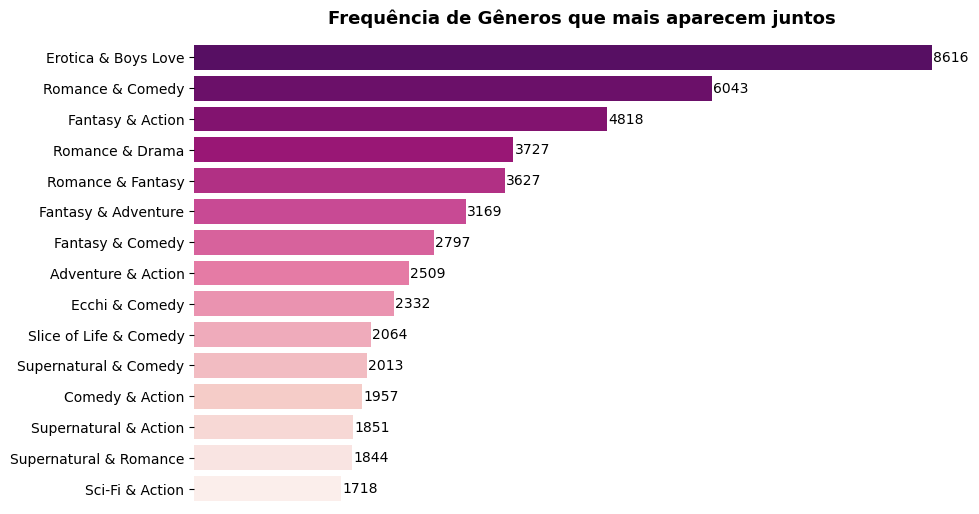

In [43]:
plt.figure(figsize=(10,6))
titulo = plt.title('Frequência de Gêneros que mais aparecem juntos', fontsize=13, fontweight='bold', pad=13)
ax = sns.barplot(data=df_pares_generos.head(15), x='frequencia', y='generos',  palette='RdPu_r')
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 15, p.get_y() + p.get_height()/2, int(width), va='center')
ax.xaxis.set_visible(False)
sns.despine(left=True, bottom=True)
plt.ylabel('')
# Para salvar os gráficos
plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

#### Quais são os 10 temas com mais obras?

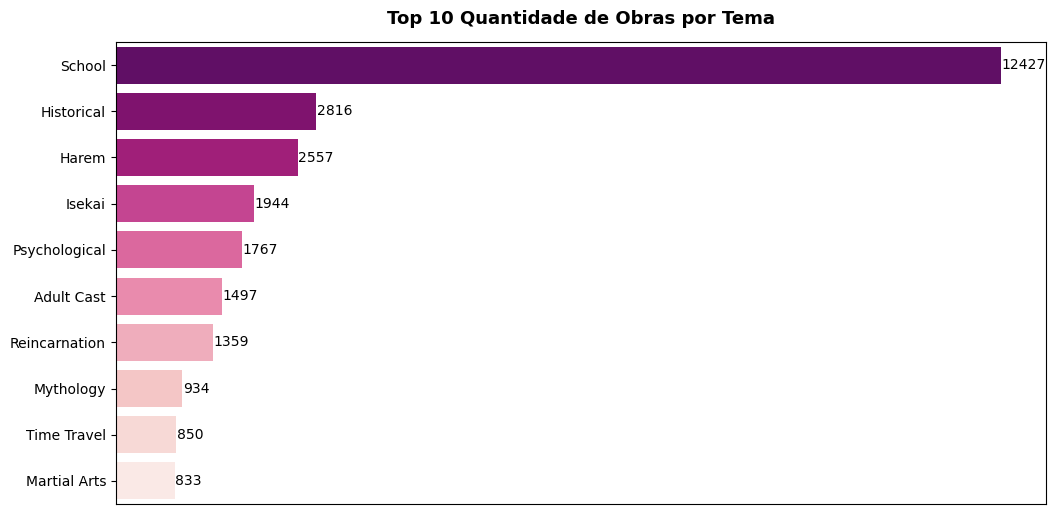

In [44]:
plt.figure(figsize=(12,6))
titulo = plt.title('Top 10 Quantidade de Obras por Tema', fontsize=13, fontweight='bold', pad=13)
ax = sns.barplot(data=df_frequencia_themes.head(10), x='frequencia', y='tema', palette='RdPu_r')
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 5, p.get_y() + p.get_height()/2, int(width), va='center')
ax.xaxis.set_visible(False)
plt.ylabel('')
# Para salvar os gráficos
plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

#### Quais são os temas que mais aparecem juntos?

In [45]:
# Cria matriz de coocorrências de temas
mlb = MultiLabelBinarizer()
# Separa os temas
temas_bin = mlb.fit_transform(df_limpo['themes'])
df_temas_bin = pd.DataFrame(temas_bin, columns=mlb.classes_)
matriz = df_temas_bin.T.dot(df_temas_bin)
matriz_triang = matriz.where(~np.triu(np.ones(matriz.shape)).astype(bool))
ocorrencias_temas = (matriz_triang.stack().loc[lambda s: s > 0].sort_values(ascending=False))

In [46]:
# Renomeia as colunas
df_pares_temas = ocorrencias_temas.reset_index()
df_pares_temas.columns = ['tema1', 'tema2', 'frequencia']

In [47]:
# Cria uma nova coluna concatenando os nomes dos temas
df_pares_temas['temas'] = df_pares_temas['tema1'] + ' & ' + df_pares_temas['tema2']

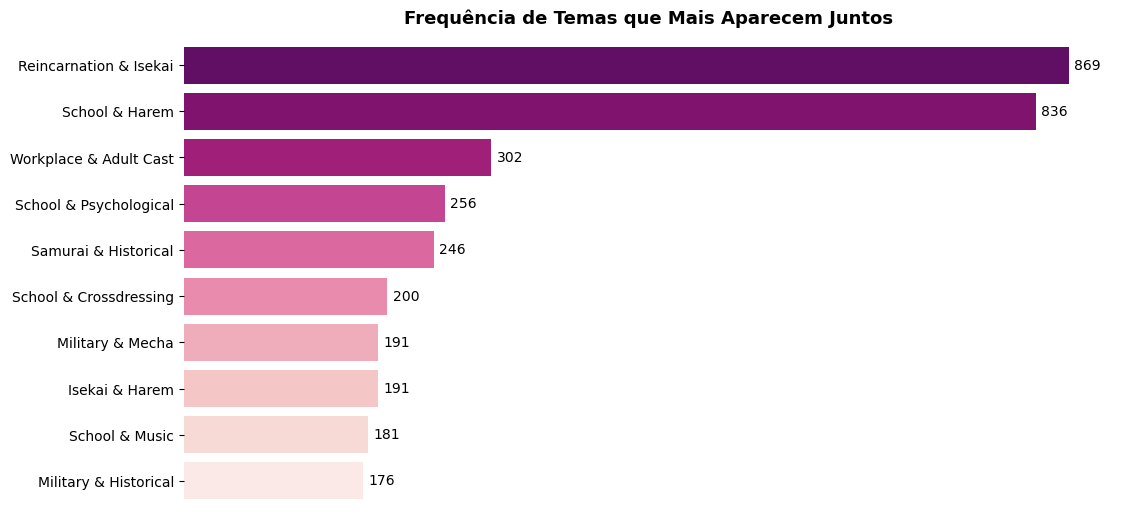

In [48]:
plt.figure(figsize=(12,6))
titulo = plt.title('Frequência de Temas que Mais Aparecem Juntos', fontsize=13, fontweight='bold', pad=13)
ax = sns.barplot(data=df_pares_temas.head(10), x='frequencia', y='temas', palette='RdPu_r')
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 5, p.get_y() + p.get_height()/2, int(width), va='center')
ax.xaxis.set_visible(False)
sns.despine(left=True, bottom=True)
plt.ylabel('')
# Para salvar os gráficos
plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

#### Como é a proporção de demografias?

In [49]:
# Calcula a frequência dos valores da coluna demographic
frequencia_demographic = Counter([demographic for d in df_limpo['demographic'] for demographic in d])

In [50]:
# Cria um dataframe para armazenar o resultado
df_frequencia_demographic = pd.DataFrame.from_dict(frequencia_demographic, orient='index', columns=['frequencia'])

In [51]:
# Ordena pelo mais frequente
df_frequencia_demographic = df_frequencia_demographic.sort_values(by='frequencia', ascending=False)

In [52]:
# Renomeia as colunas
df_frequencia_demographic.reset_index(inplace=True)
df_frequencia_demographic.rename(columns={'index':'demographic'}, inplace=True)

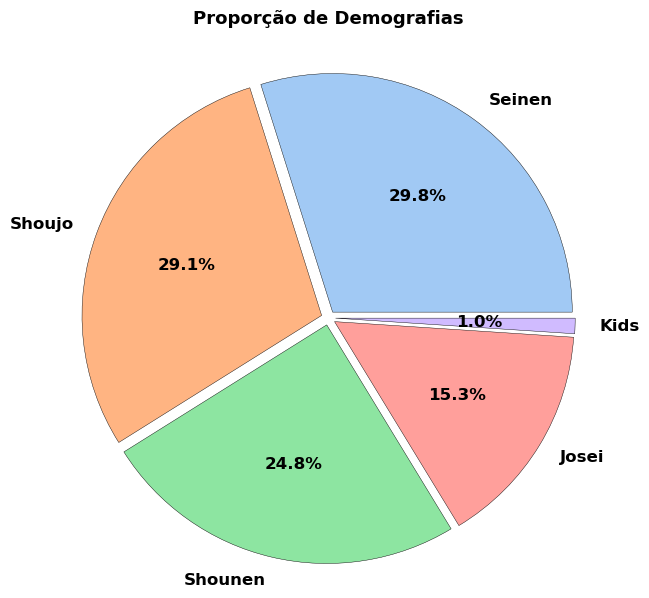

In [53]:
plt.figure(figsize=(7,7))
plt.pie(df_frequencia_demographic['frequencia'], 
        labels=df_frequencia_demographic['demographic'], 
        autopct='%1.1f%%',
        colors= sns.color_palette("pastel"),
        explode=[0.03] * len(df_frequencia_demographic['frequencia']),
        wedgeprops={'linewidth':0.3, 'edgecolor':'black'},
        textprops={'fontsize':12, 'fontweight':'bold'})
plt.title('Proporção de Demografias', fontsize=13, fontweight='bold', pad=18)
plt.axis('equal')
# Para salvar o gráfico
plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

#### Como é a distribuição dos tipos de obras (mangás, manwhas, light novels, etc..)?

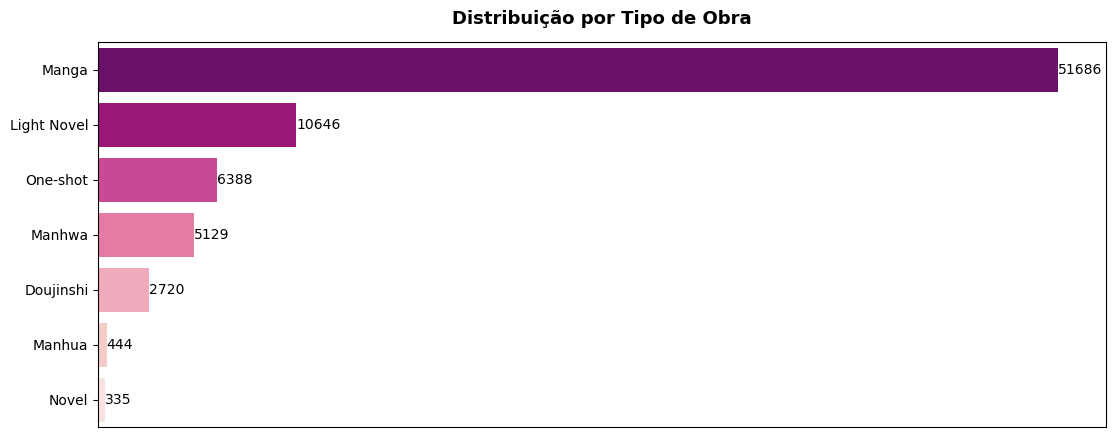

In [54]:
plt.figure(figsize=(13, 5))
titulo = plt.title('Distribuição por Tipo de Obra', fontsize=13, fontweight='bold', pad=13)
ax = sns.countplot(data=df_limpo, y='item_type', order=df_limpo['item_type'].value_counts().index,  palette='RdPu_r')
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 1, p.get_y() + p.get_height()/2, int(width), va='center')
plt.ylabel('')
ax.xaxis.set_visible(False)
# Para salvar os gráficos
plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

#### Como é a distribuição da quantidade de capítulos dos Mangás?

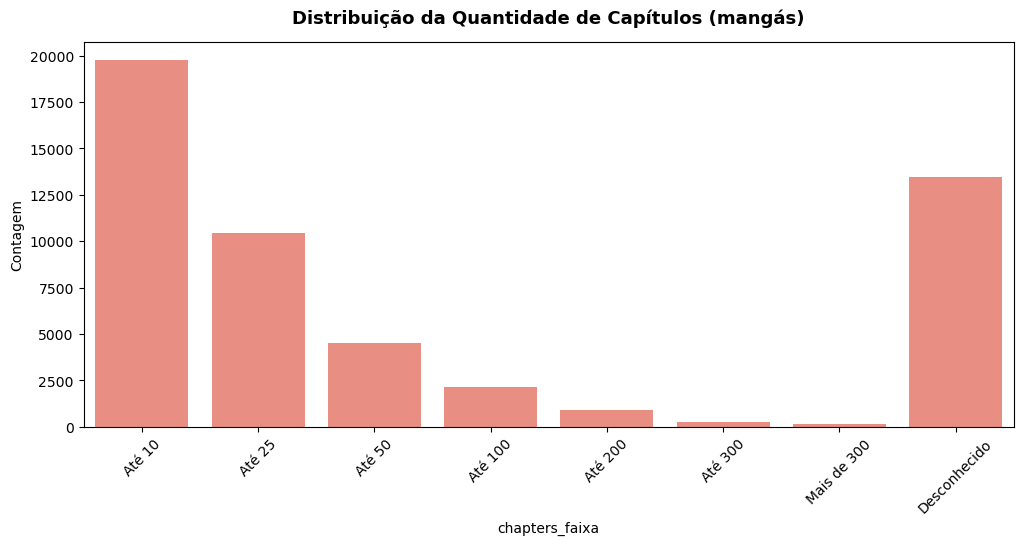

In [55]:
plt.figure(figsize=(12, 5))
titulo = plt.title('Distribuição da Quantidade de Capítulos (mangás)', fontsize=13, fontweight='bold', pad=13)
sns.countplot(x='chapters_faixa', 
              data=df_limpo[df_limpo['item_type'] == 'Manga'], 
              order=df_limpo['chapters_faixa'].cat.categories, color='Salmon')
plt.xlabel('chapters_faixa')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
# Para salvar os gráficos
plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

#### Como é a distribuição da quantidade de Volumes (excluindo one-shots)?

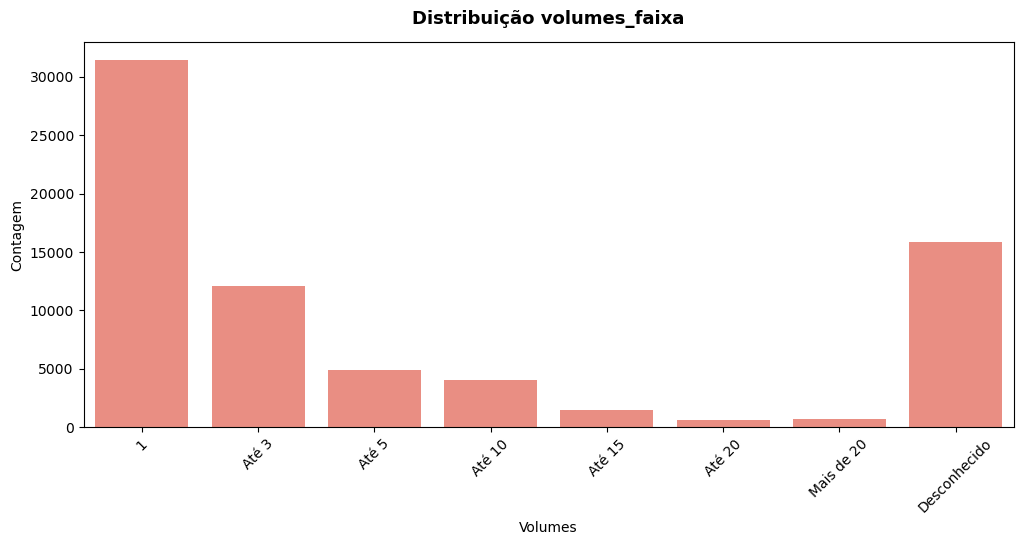

In [56]:
plt.figure(figsize=(12, 5))
titulo = plt.title('Distribuição volumes_faixa', fontsize=13, fontweight='bold', pad=13)
sns.countplot(data=df_limpo[df_limpo['item_type'] != "One-shot"],
              x='volumes_faixa',
              order=df_limpo['volumes_faixa'].cat.categories,
              color='Salmon')
plt.xlabel('Volumes')
plt.ylabel('Contagem')
plt.xticks(rotation=45)
# Para salvar os gráficos
plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

#### Quais são as 10 obras com maior nota em hiato?

In [57]:
df_hiato = df_limpo[df_limpo['status'] == 'On Hiatus'].sort_values(by='score', ascending=False)

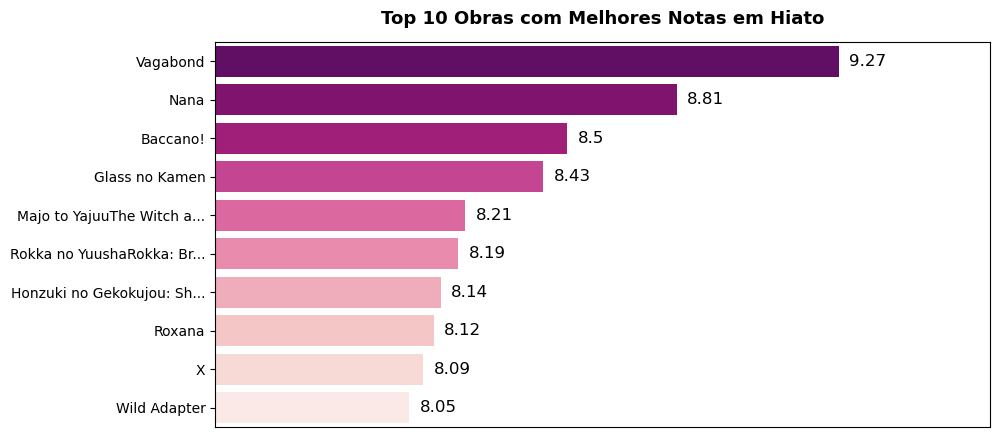

In [58]:
plt.figure(figsize=(10,5))
titulo = plt.title('Top 10 Obras com Melhores Notas em Hiato', fontsize=13, fontweight='bold', pad=13)
ax = sns.barplot(data=df_hiato.head(10), x='score', y='title_name', palette='RdPu_r')
labels = [label.get_text()[:24] + '...' if len(label.get_text()) > 24 else label.get_text() for label in ax.get_yticklabels()]
ax.set_yticklabels(labels)
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.03, p.get_y() + p.get_height()/2, float(width), va='center',  fontsize=12)
ax.xaxis.set_visible(False)
plt.ylabel('')
plt.xlim(7.50,9.70)
# Para salvar o gráfico
plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

#### Apenas entre as obras em andamento, qual é a distribuição de gêneros?

In [59]:
df_publishing = df_limpo[df_limpo['status'] == 'Publishing']

In [60]:
# Calcula a frequência dos valores da coluna genres
frequencia_genres_publishing = Counter([genre for g in df_publishing['genres'] for genre in g])

In [61]:
df_frequencia_genres_publishing = pd.DataFrame.from_dict(frequencia_genres_publishing, orient='index', columns=['frequencia'])

In [62]:
# Ordena pelo mais frequente
df_frequencia_genres_publishing = df_frequencia_genres_publishing.sort_values(by='frequencia', ascending=False)

In [63]:
df_frequencia_genres_publishing.reset_index(inplace=True)
df_frequencia_genres_publishing.rename(columns={'index':'genero'}, inplace=True)

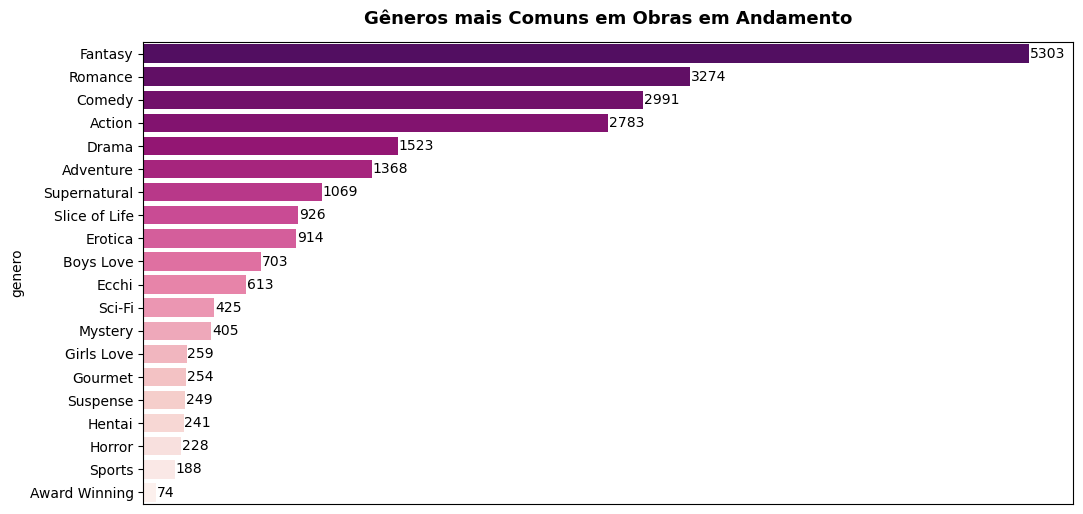

In [64]:
plt.figure(figsize=(12,6))
titulo = plt.title('Gêneros mais Comuns em Obras em Andamento', fontsize=13, fontweight='bold', pad=13)
ax = sns.barplot(data=df_frequencia_genres_publishing, x='frequencia', y='genero',  palette='RdPu_r')
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 5, p.get_y() + p.get_height()/2, int(width), va='center')
ax.xaxis.set_visible(False)

# Para salvar os gráficos
plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

#### Apenas entre as obras em andamento, qual é a distribuição de demografias?

In [65]:
frequencia_demographic_publishing = Counter([demographic for d in df_publishing['demographic'] for demographic in d])

In [66]:
df_frequencia_demographic_publishing = pd.DataFrame.from_dict(frequencia_demographic_publishing, orient='index', columns=['frequencia'])

In [67]:
# Ordena pelo mais frequente
df_frequencia_demographic_publishing = df_frequencia_demographic_publishing.sort_values(by='frequencia', ascending=False)

In [68]:
df_frequencia_demographic_publishing.reset_index(inplace=True)
df_frequencia_demographic_publishing.rename(columns={'index':'demographic'}, inplace=True)

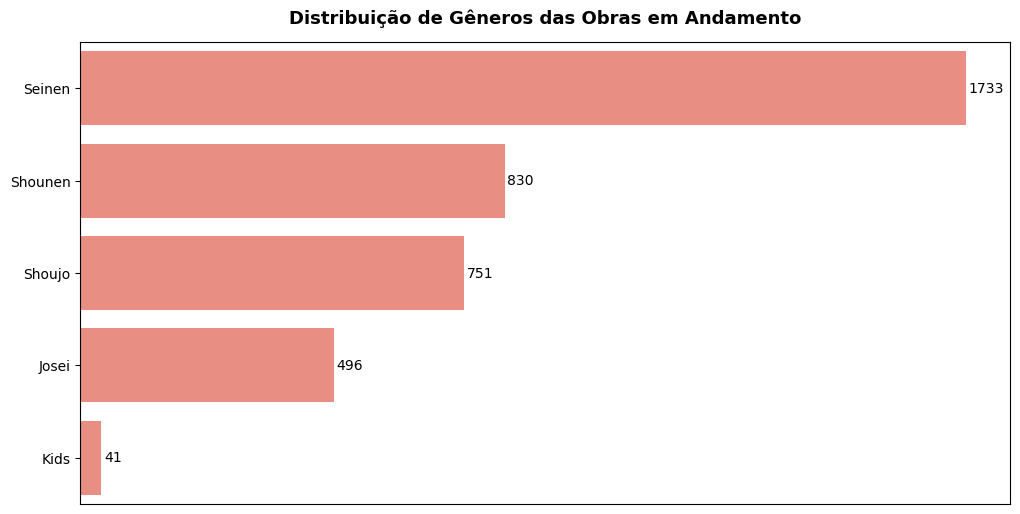

In [69]:
plt.figure(figsize=(12,6))
titulo = plt.title('Distribuição de Gêneros das Obras em Andamento', fontsize=13, fontweight='bold', pad=13)
ax = sns.barplot(data=df_frequencia_demographic_publishing, x='frequencia', y='demographic', color='Salmon')
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 5, p.get_y() + p.get_height()/2, int(width), va='center')
ax.xaxis.set_visible(False)
plt.ylabel('')
# Para salvar os gráficos
plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

#### Quais são os 15 Autores com mais obras?

In [70]:
df_aut_exp = df_limpo.explode('authors')

In [71]:
freq_autores = df_aut_exp['authors'].value_counts()

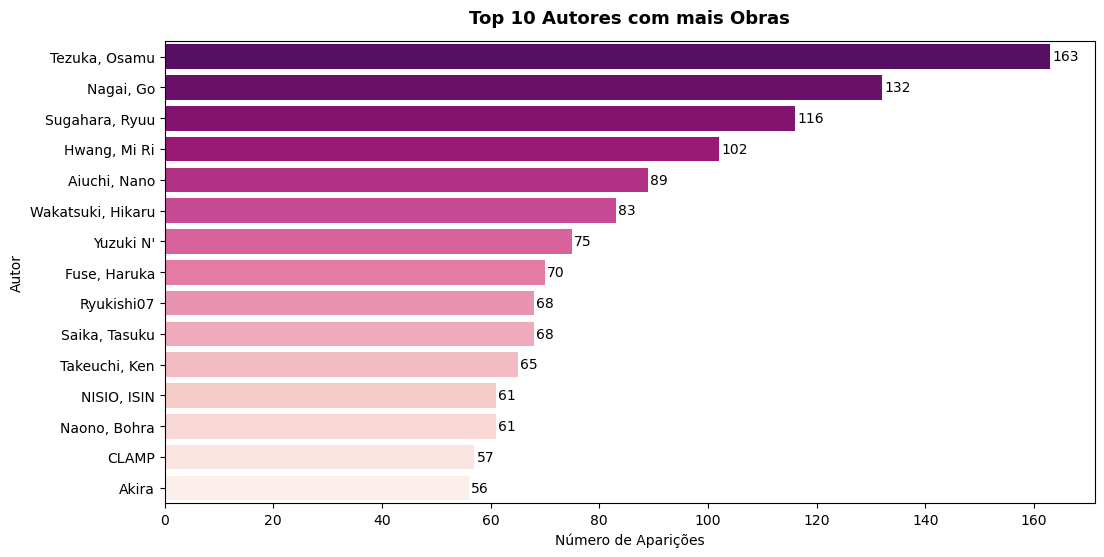

In [72]:
plt.figure(figsize=(12,6))
title = plt.title('Top 10 Autores com mais Obras', fontsize=13, fontweight='bold', pad=13)
ax = sns.barplot(x=freq_autores.head(15).values, y=freq_autores.head(15).index, palette='RdPu_r')
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.4, p.get_y() + p.get_height()/2, int(width), va='center')
plt.xlabel('Quantidade de Obras')
plt.ylabel('Autor')
# Para salvar os gráficos
plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

#### Quais os 15 autores de mangás que possuem mais obras?

In [73]:
df_mangas = df_limpo[df_limpo['item_type'] == 'Manga']

In [74]:
df_mangas_exp = df_mangas.explode('authors')

In [75]:
freq_autores = df_mangas_exp['authors'].value_counts()

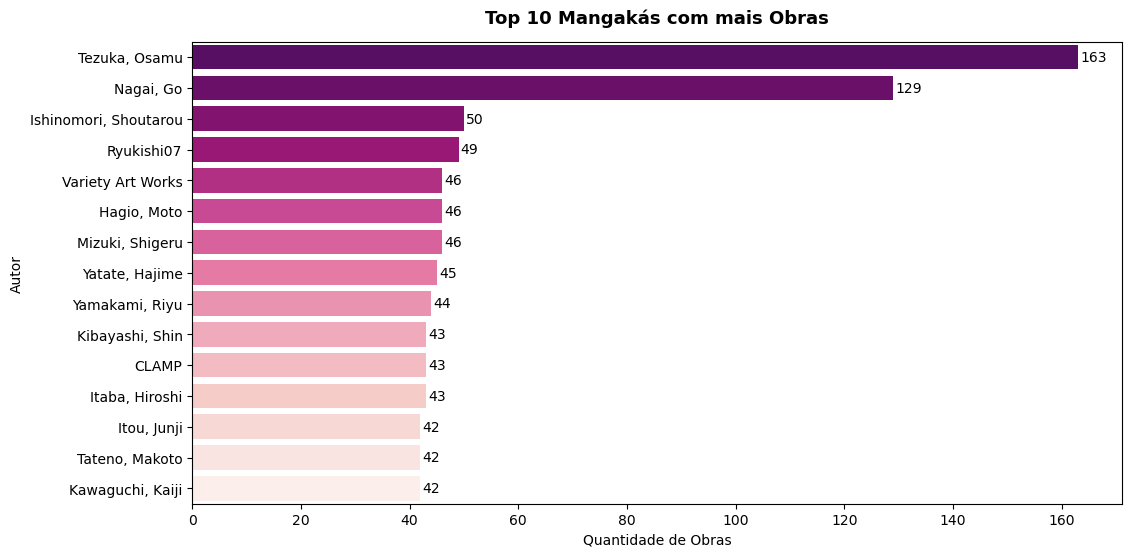

In [110]:
plt.figure(figsize=(12,6))
title = plt.title('Top 10 Mangakás com mais Obras', fontsize=13, fontweight='bold', pad=13)
ax = sns.barplot(x=freq_autores.head(15).values, y=freq_autores.head(15).index, palette='RdPu_r')
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.4, p.get_y() + p.get_height()/2, int(width), va='center')
plt.xlabel('Quantidade de Obras')
plt.ylabel('Autor')
# Para salvar os gráficos
plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

#### Quais revistas/plataformas que mais possuem publicações de obras em andamento?

In [77]:
df_seria_exp = df_publishing.explode('serialization')

In [78]:
freq_serialization = df_seria_exp['serialization'].value_counts()

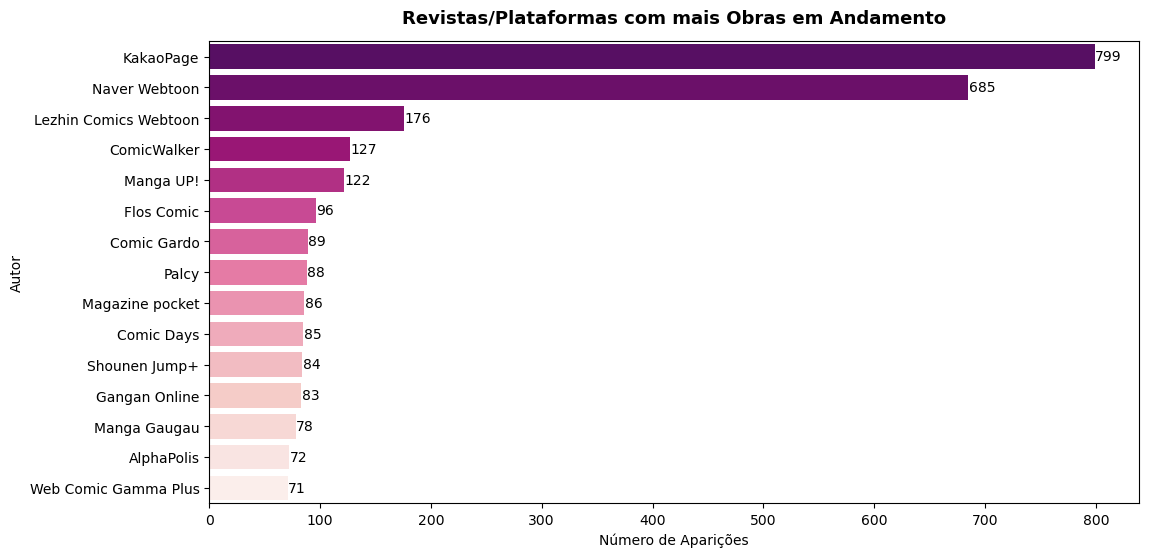

In [79]:
plt.figure(figsize=(12,6))
title = plt.title('Revistas/Plataformas com mais Obras em Andamento', fontsize=13, fontweight='bold', pad=13)
ax = sns.barplot(x=freq_serialization.head(15).values, y=freq_serialization.head(15).index, palette='RdPu_r')
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.4, p.get_y() + p.get_height()/2, int(width), va='center')
plt.xlabel('Quantidade de Obras')
plt.ylabel('Autor')
# Para salvar os gráficos
plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

#### Qual a quantidade de obras lançadas nos últimos 20 anos?

In [80]:
# Contagem por ano
obras_por_ano = df_limpo['start_year'].value_counts().sort_values(ascending=False)

In [81]:
# Renomeia as colunas
df_obras_por_ano = obras_por_ano.reset_index()
df_obras_por_ano.columns = ['ano', 'quantidade']

In [82]:
df_obras_por_ano.shape

(85, 2)

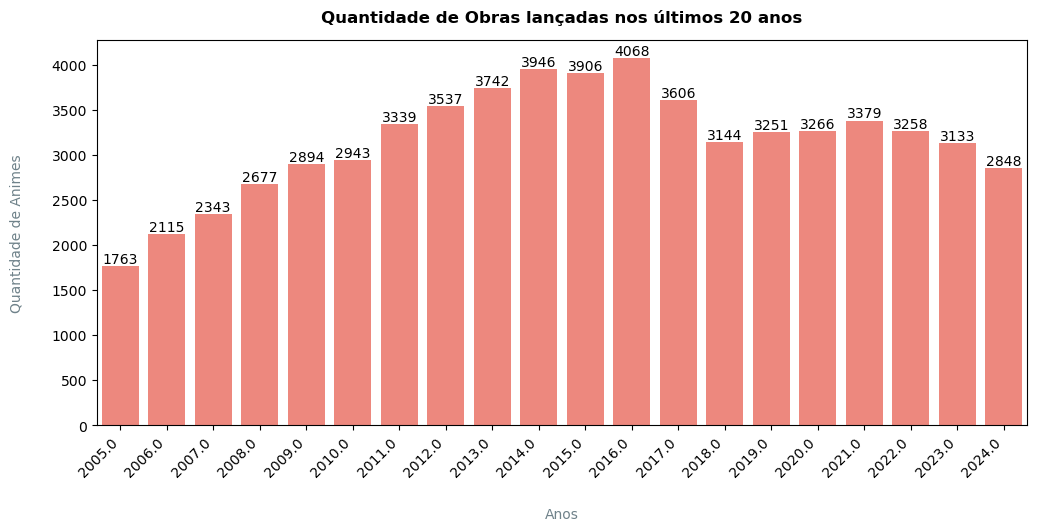

In [103]:
plt.figure(figsize=(12,5))
titulo = plt.title('Quantidade de Obras lançadas nos últimos 20 anos', fontsize=12, fontweight='bold', pad=13)
ax = sns.barplot(data=df_obras_por_ano.head(20).sort_values('ano'), x='ano', y='quantidade', color=sns.xkcd_rgb['salmon'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=10)
plt.xlabel('Anos', labelpad=20, color=sns.xkcd_rgb['steel grey'])
plt.ylabel('Quantidade de Animes', labelpad=20, color=sns.xkcd_rgb['steel grey'])
plt.xticks(rotation=45, ha='right')
# Para salvar os gráficos
plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")plt.show()
plt.show()

#### Qual a quantidade de mangás lançado nos últimos 20 anos?

In [84]:
df_manga = df_limpo[df_limpo['item_type'] == 'Manga']

In [85]:
mangas_por_ano = df_manga['start_year'].value_counts().sort_values(ascending=False)

In [86]:
# Renomeia as colunas
df_mangas_por_ano = mangas_por_ano.reset_index()
df_mangas_por_ano.columns = ['ano', 'quantidade']

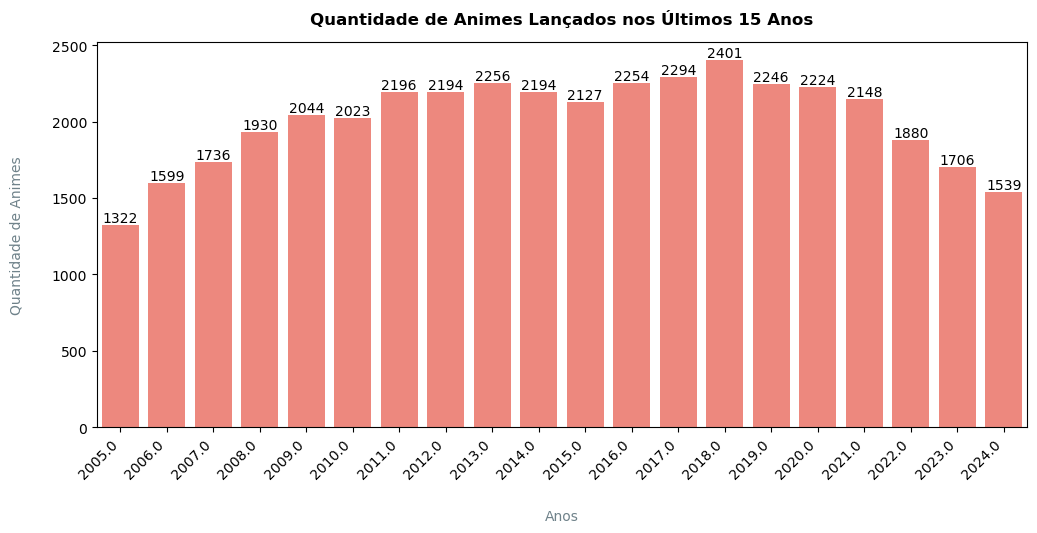

In [87]:
plt.figure(figsize=(12,5))
titulo = plt.title('Quantidade de Animes Lançados nos Últimos 15 Anos', fontsize=12, fontweight='bold', pad=13)
ax = sns.barplot(data=df_mangas_por_ano.head(20).sort_values('ano'), x='ano', y='quantidade', color=sns.xkcd_rgb['salmon'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=10)
plt.xlabel('Anos', labelpad=20, color=sns.xkcd_rgb['steel grey'])
plt.ylabel('Quantidade de Animes', labelpad=20, color=sns.xkcd_rgb['steel grey'])
plt.xticks(rotation=45, ha='right')
# Para salvar os gráficos
plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

#### Qual a quantidade de manwhas lançadas nos últimos anos?

In [98]:
df_manhwa = df_limpo[df_limpo['item_type'] == 'Manhwa']

In [99]:
manhwas_por_ano = df_manhwa['start_year'].value_counts()

In [100]:
# Renomeia as colunas
df_manhwas_por_ano = manhwas_por_ano.reset_index()
df_manhwas_por_ano.columns = ['ano', 'quantidade']

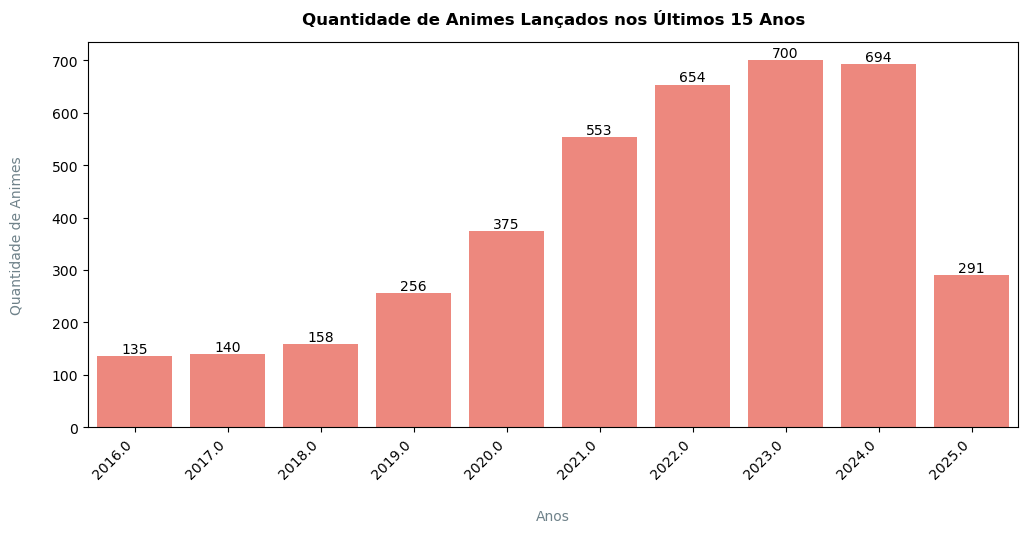

In [101]:
plt.figure(figsize=(12,5))
titulo = plt.title('Quantidade de Animes Lançados nos Últimos 15 Anos', fontsize=12, fontweight='bold', pad=13)
ax = sns.barplot(data=df_manhwas_por_ano.head(10).sort_values('ano'), x='ano', y='quantidade', color=sns.xkcd_rgb['salmon'])
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=10)
plt.xlabel('Anos', labelpad=20, color=sns.xkcd_rgb['steel grey'])
plt.ylabel('Quantidade de Animes', labelpad=20, color=sns.xkcd_rgb['steel grey'])
plt.xticks(rotation=45, ha='right')
# Para salvar os gráficos
plt.savefig(f"../graphs/{titulo.get_text().replace(' ', '_') + '.png'}")
plt.show()

### Fim

To be continue...

In [92]:
%watermark -a "Gregory280"

Author: Gregory280



In [93]:
%watermark --iversions

sklearn   : 1.6.1
matplotlib: 3.10.0
numpy     : 2.1.3
seaborn   : 0.13.2
pandas    : 2.2.3
missingno : 0.5.2

